In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import distortion

/home/gehrin/miniconda3/envs/vlm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gehrin/miniconda3/envs/vlm/lib/python3.12/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.22). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tools import *
import pandas as pd
from distortion import Abstract
import distortion
from tqdm import tqdm
import argparse
import optuna
import albumentations as A
import torch
from tools_io import *

In [58]:
# print(*[0.01 * i for i in range(1, 100)], *[i for i in range(1, 10)], *np.arange(10, 21, 1))
arr = np.linspace(1,2,50)
sigmas = ' '.join(np.char.mod("%f", np.linspace(0.01/255,1,64)))
sigmas = ' '.join(np.char.mod("%f", np.linspace(0.4,20,64))) + ' 100'
print(sigmas)

0.400000 0.711111 1.022222 1.333333 1.644444 1.955556 2.266667 2.577778 2.888889 3.200000 3.511111 3.822222 4.133333 4.444444 4.755556 5.066667 5.377778 5.688889 6.000000 6.311111 6.622222 6.933333 7.244444 7.555556 7.866667 8.177778 8.488889 8.800000 9.111111 9.422222 9.733333 10.044444 10.355556 10.666667 10.977778 11.288889 11.600000 11.911111 12.222222 12.533333 12.844444 13.155556 13.466667 13.777778 14.088889 14.400000 14.711111 15.022222 15.333333 15.644444 15.955556 16.266667 16.577778 16.888889 17.200000 17.511111 17.822222 18.133333 18.444444 18.755556 19.066667 19.377778 19.688889 20.000000 100


In [59]:
df = pd.DataFrame()

In [60]:
import runner
import argparse

string = f'python runner.py --filter gaussian_blur --ksize 9 11 93 --sigma {sigmas} --min_value 20 --max_value 50 --path videos/pedestrian_area_540p25_25f.y4m --save result.csv'.split()
# string = f'python runner.py --filter uniform_connected_noise --temporal_mod per_frame --overlay additive --delta {sigmas} --min_value 20 --max_value 50 --path videos/pedestrian_area_540p25_25f.y4m --save result.csv'.split()

parser = argparse.ArgumentParser()
parser.add_argument('--filter', type=str)
parser.add_argument('--path', type=str)
parser.add_argument('--min_value', type=int, default=0)
parser.add_argument('--max_value', type=int, default=100)
first_args, _ = parser.parse_known_args(string)
filter_cls = distortion.distortion_zoo[first_args.filter]
for key, params in filter_cls.get_params_info().items():
    parser.add_argument(f'-{key}', f'--{key}',
                        type=params['type'], nargs='+', default=[params['default']])
args, _ = parser.parse_known_args(string)

reader = y4m_reader(args.path)
parameters = vars(args)
parameters = {key: value for key, value in parameters.items(
) if key in filter_cls.get_params_info().keys()}

print(parameters)

df_new = runner.run_params_grid(reader, filter_cls, parameters)

{'ksize': [9, 11, 93], 'sigma': [0.4, 0.711111, 1.022222, 1.333333, 1.644444, 1.955556, 2.266667, 2.577778, 2.888889, 3.2, 3.511111, 3.822222, 4.133333, 4.444444, 4.755556, 5.066667, 5.377778, 5.688889, 6.0, 6.311111, 6.622222, 6.933333, 7.244444, 7.555556, 7.866667, 8.177778, 8.488889, 8.8, 9.111111, 9.422222, 9.733333, 10.044444, 10.355556, 10.666667, 10.977778, 11.288889, 11.6, 11.911111, 12.222222, 12.533333, 12.844444, 13.155556, 13.466667, 13.777778, 14.088889, 14.4, 14.711111, 15.022222, 15.333333, 15.644444, 15.955556, 16.266667, 16.577778, 16.888889, 17.2, 17.511111, 17.822222, 18.133333, 18.444444, 18.755556, 19.066667, 19.377778, 19.688889, 20.0, 100.0]}
(195, 2)
Parameters:  {'ksize': 9.0, 'sigma': 0.4}


25it [00:00, 271.53it/s]


Parameters:  {'ksize': 9.0, 'sigma': 0.711111}


25it [00:00, 208.64it/s]


Parameters:  {'ksize': 9.0, 'sigma': 1.022222}


25it [00:00, 238.53it/s]


Parameters:  {'ksize': 9.0, 'sigma': 1.333333}


25it [00:00, 255.01it/s]


Parameters:  {'ksize': 9.0, 'sigma': 1.644444}


25it [00:00, 265.47it/s]


Parameters:  {'ksize': 9.0, 'sigma': 1.955556}


25it [00:00, 245.09it/s]


Parameters:  {'ksize': 9.0, 'sigma': 2.266667}


25it [00:00, 253.74it/s]


Parameters:  {'ksize': 9.0, 'sigma': 2.577778}


25it [00:00, 227.82it/s]


Parameters:  {'ksize': 9.0, 'sigma': 2.888889}


25it [00:00, 243.22it/s]


Parameters:  {'ksize': 9.0, 'sigma': 3.2}


25it [00:00, 270.78it/s]


Parameters:  {'ksize': 9.0, 'sigma': 3.511111}


25it [00:00, 232.25it/s]


Parameters:  {'ksize': 9.0, 'sigma': 3.822222}


25it [00:00, 270.27it/s]


Parameters:  {'ksize': 9.0, 'sigma': 4.133333}


25it [00:00, 267.17it/s]


Parameters:  {'ksize': 9.0, 'sigma': 4.444444}


25it [00:00, 251.31it/s]


Parameters:  {'ksize': 9.0, 'sigma': 4.755556}


25it [00:00, 241.69it/s]


Parameters:  {'ksize': 9.0, 'sigma': 5.066667}


25it [00:00, 257.36it/s]


Parameters:  {'ksize': 9.0, 'sigma': 5.377778}


25it [00:00, 246.78it/s]


Parameters:  {'ksize': 9.0, 'sigma': 5.688889}


25it [00:00, 239.99it/s]


Parameters:  {'ksize': 9.0, 'sigma': 6.0}


25it [00:00, 271.78it/s]


Parameters:  {'ksize': 9.0, 'sigma': 6.311111}


25it [00:00, 202.11it/s]


Parameters:  {'ksize': 9.0, 'sigma': 6.622222}


25it [00:00, 233.38it/s]


Parameters:  {'ksize': 9.0, 'sigma': 6.933333}


25it [00:00, 259.01it/s]


Parameters:  {'ksize': 9.0, 'sigma': 7.244444}


25it [00:00, 216.27it/s]


Parameters:  {'ksize': 9.0, 'sigma': 7.555556}


25it [00:00, 234.87it/s]


Parameters:  {'ksize': 9.0, 'sigma': 7.866667}


25it [00:00, 256.36it/s]


Parameters:  {'ksize': 9.0, 'sigma': 8.177778}


25it [00:00, 210.79it/s]


Parameters:  {'ksize': 9.0, 'sigma': 8.488889}


25it [00:00, 247.87it/s]


Parameters:  {'ksize': 9.0, 'sigma': 8.8}


25it [00:00, 220.41it/s]


Parameters:  {'ksize': 9.0, 'sigma': 9.111111}


25it [00:00, 237.97it/s]


Parameters:  {'ksize': 9.0, 'sigma': 9.422222}


25it [00:00, 234.19it/s]


Parameters:  {'ksize': 9.0, 'sigma': 9.733333}


25it [00:00, 240.02it/s]


Parameters:  {'ksize': 9.0, 'sigma': 10.044444}


25it [00:00, 207.38it/s]


Parameters:  {'ksize': 9.0, 'sigma': 10.355556}


25it [00:00, 257.28it/s]


Parameters:  {'ksize': 9.0, 'sigma': 10.666667}


25it [00:00, 242.71it/s]


Parameters:  {'ksize': 9.0, 'sigma': 10.977778}


25it [00:00, 261.41it/s]


Parameters:  {'ksize': 9.0, 'sigma': 11.288889}


25it [00:00, 203.28it/s]


Parameters:  {'ksize': 9.0, 'sigma': 11.6}


25it [00:00, 210.74it/s]


Parameters:  {'ksize': 9.0, 'sigma': 11.911111}


25it [00:00, 235.63it/s]


Parameters:  {'ksize': 9.0, 'sigma': 12.222222}


25it [00:00, 229.14it/s]


Parameters:  {'ksize': 9.0, 'sigma': 12.533333}


25it [00:00, 194.29it/s]


Parameters:  {'ksize': 9.0, 'sigma': 12.844444}


25it [00:00, 197.06it/s]


Parameters:  {'ksize': 9.0, 'sigma': 13.155556}


25it [00:00, 238.71it/s]


Parameters:  {'ksize': 9.0, 'sigma': 13.466667}


25it [00:00, 245.41it/s]


Parameters:  {'ksize': 9.0, 'sigma': 13.777778}


25it [00:00, 231.43it/s]


Parameters:  {'ksize': 9.0, 'sigma': 14.088889}


25it [00:00, 241.51it/s]


Parameters:  {'ksize': 9.0, 'sigma': 14.4}


25it [00:00, 239.89it/s]


Parameters:  {'ksize': 9.0, 'sigma': 14.711111}


25it [00:00, 242.79it/s]


Parameters:  {'ksize': 9.0, 'sigma': 15.022222}


25it [00:00, 242.88it/s]


Parameters:  {'ksize': 9.0, 'sigma': 15.333333}


25it [00:00, 251.84it/s]


Parameters:  {'ksize': 9.0, 'sigma': 15.644444}


25it [00:00, 260.94it/s]


Parameters:  {'ksize': 9.0, 'sigma': 15.955556}


25it [00:00, 251.69it/s]


Parameters:  {'ksize': 9.0, 'sigma': 16.266667}


25it [00:00, 258.69it/s]


Parameters:  {'ksize': 9.0, 'sigma': 16.577778}


25it [00:00, 215.28it/s]


Parameters:  {'ksize': 9.0, 'sigma': 16.888889}


25it [00:00, 243.60it/s]


Parameters:  {'ksize': 9.0, 'sigma': 17.2}


25it [00:00, 256.49it/s]


Parameters:  {'ksize': 9.0, 'sigma': 17.511111}


25it [00:00, 240.65it/s]


Parameters:  {'ksize': 9.0, 'sigma': 17.822222}


25it [00:00, 251.90it/s]


Parameters:  {'ksize': 9.0, 'sigma': 18.133333}


25it [00:00, 238.47it/s]


Parameters:  {'ksize': 9.0, 'sigma': 18.444444}


25it [00:00, 270.69it/s]


Parameters:  {'ksize': 9.0, 'sigma': 18.755556}


25it [00:00, 246.87it/s]


Parameters:  {'ksize': 9.0, 'sigma': 19.066667}


25it [00:00, 259.88it/s]


Parameters:  {'ksize': 9.0, 'sigma': 19.377778}


25it [00:00, 263.80it/s]


Parameters:  {'ksize': 9.0, 'sigma': 19.688889}


25it [00:00, 266.37it/s]


Parameters:  {'ksize': 9.0, 'sigma': 20.0}


25it [00:00, 236.29it/s]


Parameters:  {'ksize': 9.0, 'sigma': 100.0}


25it [00:00, 207.62it/s]


Parameters:  {'ksize': 11.0, 'sigma': 0.4}


25it [00:00, 238.14it/s]


Parameters:  {'ksize': 11.0, 'sigma': 0.711111}


25it [00:00, 239.71it/s]


Parameters:  {'ksize': 11.0, 'sigma': 1.022222}


25it [00:00, 235.14it/s]


Parameters:  {'ksize': 11.0, 'sigma': 1.333333}


25it [00:00, 238.42it/s]


Parameters:  {'ksize': 11.0, 'sigma': 1.644444}


25it [00:00, 239.13it/s]


Parameters:  {'ksize': 11.0, 'sigma': 1.955556}


25it [00:00, 238.77it/s]


Parameters:  {'ksize': 11.0, 'sigma': 2.266667}


25it [00:00, 222.63it/s]


Parameters:  {'ksize': 11.0, 'sigma': 2.577778}


25it [00:00, 224.69it/s]


Parameters:  {'ksize': 11.0, 'sigma': 2.888889}


25it [00:00, 218.90it/s]


Parameters:  {'ksize': 11.0, 'sigma': 3.2}


25it [00:00, 230.19it/s]


Parameters:  {'ksize': 11.0, 'sigma': 3.511111}


25it [00:00, 236.02it/s]


Parameters:  {'ksize': 11.0, 'sigma': 3.822222}


25it [00:00, 183.87it/s]


Parameters:  {'ksize': 11.0, 'sigma': 4.133333}


25it [00:00, 227.45it/s]


Parameters:  {'ksize': 11.0, 'sigma': 4.444444}


25it [00:00, 221.87it/s]


Parameters:  {'ksize': 11.0, 'sigma': 4.755556}


25it [00:00, 209.85it/s]


Parameters:  {'ksize': 11.0, 'sigma': 5.066667}


25it [00:00, 226.78it/s]


Parameters:  {'ksize': 11.0, 'sigma': 5.377778}


25it [00:00, 231.66it/s]


Parameters:  {'ksize': 11.0, 'sigma': 5.688889}


25it [00:00, 200.99it/s]


Parameters:  {'ksize': 11.0, 'sigma': 6.0}


25it [00:00, 212.00it/s]


Parameters:  {'ksize': 11.0, 'sigma': 6.311111}


25it [00:00, 226.59it/s]


Parameters:  {'ksize': 11.0, 'sigma': 6.622222}


25it [00:00, 226.03it/s]


Parameters:  {'ksize': 11.0, 'sigma': 6.933333}


25it [00:00, 232.12it/s]


Parameters:  {'ksize': 11.0, 'sigma': 7.244444}


25it [00:00, 217.43it/s]


Parameters:  {'ksize': 11.0, 'sigma': 7.555556}


25it [00:00, 235.27it/s]


Parameters:  {'ksize': 11.0, 'sigma': 7.866667}


25it [00:00, 196.04it/s]


Parameters:  {'ksize': 11.0, 'sigma': 8.177778}


25it [00:00, 213.84it/s]


Parameters:  {'ksize': 11.0, 'sigma': 8.488889}


25it [00:00, 218.23it/s]


Parameters:  {'ksize': 11.0, 'sigma': 8.8}


25it [00:00, 209.66it/s]


Parameters:  {'ksize': 11.0, 'sigma': 9.111111}


25it [00:00, 223.56it/s]


Parameters:  {'ksize': 11.0, 'sigma': 9.422222}


25it [00:00, 217.00it/s]


Parameters:  {'ksize': 11.0, 'sigma': 9.733333}


25it [00:00, 218.20it/s]


Parameters:  {'ksize': 11.0, 'sigma': 10.044444}


25it [00:00, 219.52it/s]


Parameters:  {'ksize': 11.0, 'sigma': 10.355556}


25it [00:00, 165.38it/s]


Parameters:  {'ksize': 11.0, 'sigma': 10.666667}


25it [00:00, 193.66it/s]


Parameters:  {'ksize': 11.0, 'sigma': 10.977778}


25it [00:00, 221.61it/s]


Parameters:  {'ksize': 11.0, 'sigma': 11.288889}


25it [00:00, 183.42it/s]


Parameters:  {'ksize': 11.0, 'sigma': 11.6}


25it [00:00, 214.83it/s]


Parameters:  {'ksize': 11.0, 'sigma': 11.911111}


25it [00:00, 219.37it/s]


Parameters:  {'ksize': 11.0, 'sigma': 12.222222}


25it [00:00, 204.77it/s]


Parameters:  {'ksize': 11.0, 'sigma': 12.533333}


25it [00:00, 202.71it/s]


Parameters:  {'ksize': 11.0, 'sigma': 12.844444}


25it [00:00, 210.53it/s]


Parameters:  {'ksize': 11.0, 'sigma': 13.155556}


25it [00:00, 180.68it/s]


Parameters:  {'ksize': 11.0, 'sigma': 13.466667}


25it [00:00, 221.75it/s]


Parameters:  {'ksize': 11.0, 'sigma': 13.777778}


25it [00:00, 209.76it/s]


Parameters:  {'ksize': 11.0, 'sigma': 14.088889}


25it [00:00, 222.34it/s]


Parameters:  {'ksize': 11.0, 'sigma': 14.4}


25it [00:00, 189.13it/s]


Parameters:  {'ksize': 11.0, 'sigma': 14.711111}


25it [00:00, 215.33it/s]


Parameters:  {'ksize': 11.0, 'sigma': 15.022222}


25it [00:00, 221.53it/s]


Parameters:  {'ksize': 11.0, 'sigma': 15.333333}


25it [00:00, 205.78it/s]


Parameters:  {'ksize': 11.0, 'sigma': 15.644444}


25it [00:00, 230.94it/s]


Parameters:  {'ksize': 11.0, 'sigma': 15.955556}


25it [00:00, 193.65it/s]


Parameters:  {'ksize': 11.0, 'sigma': 16.266667}


25it [00:00, 204.68it/s]


Parameters:  {'ksize': 11.0, 'sigma': 16.577778}


25it [00:00, 191.19it/s]


Parameters:  {'ksize': 11.0, 'sigma': 16.888889}


25it [00:00, 212.99it/s]


Parameters:  {'ksize': 11.0, 'sigma': 17.2}


25it [00:00, 226.89it/s]


Parameters:  {'ksize': 11.0, 'sigma': 17.511111}


25it [00:00, 219.06it/s]


Parameters:  {'ksize': 11.0, 'sigma': 17.822222}


25it [00:00, 189.95it/s]


Parameters:  {'ksize': 11.0, 'sigma': 18.133333}


25it [00:00, 229.47it/s]


Parameters:  {'ksize': 11.0, 'sigma': 18.444444}


25it [00:00, 226.43it/s]


Parameters:  {'ksize': 11.0, 'sigma': 18.755556}


25it [00:00, 232.24it/s]


Parameters:  {'ksize': 11.0, 'sigma': 19.066667}


25it [00:00, 218.75it/s]


Parameters:  {'ksize': 11.0, 'sigma': 19.377778}


25it [00:00, 202.32it/s]


Parameters:  {'ksize': 11.0, 'sigma': 19.688889}


25it [00:00, 192.04it/s]


Parameters:  {'ksize': 11.0, 'sigma': 20.0}


25it [00:00, 215.75it/s]


Parameters:  {'ksize': 11.0, 'sigma': 100.0}


25it [00:00, 209.05it/s]


Parameters:  {'ksize': 93.0, 'sigma': 0.4}


25it [00:00, 43.60it/s]


Parameters:  {'ksize': 93.0, 'sigma': 0.711111}


25it [00:01, 19.10it/s]


Parameters:  {'ksize': 93.0, 'sigma': 1.022222}


25it [00:01, 19.32it/s]


Parameters:  {'ksize': 93.0, 'sigma': 1.333333}


25it [00:01, 13.57it/s]


Parameters:  {'ksize': 93.0, 'sigma': 1.644444}


25it [00:01, 13.56it/s]


Parameters:  {'ksize': 93.0, 'sigma': 1.955556}


25it [00:01, 12.63it/s]


Parameters:  {'ksize': 93.0, 'sigma': 2.266667}


25it [00:02,  9.69it/s]


Parameters:  {'ksize': 93.0, 'sigma': 2.577778}


25it [00:02,  9.83it/s]


Parameters:  {'ksize': 93.0, 'sigma': 2.888889}


25it [00:02,  8.37it/s]


Parameters:  {'ksize': 93.0, 'sigma': 3.2}


25it [00:02,  8.46it/s]


Parameters:  {'ksize': 93.0, 'sigma': 3.511111}


25it [00:01, 15.90it/s]


Parameters:  {'ksize': 93.0, 'sigma': 3.822222}


25it [00:00, 36.97it/s]


Parameters:  {'ksize': 93.0, 'sigma': 4.133333}


25it [00:00, 39.96it/s]


Parameters:  {'ksize': 93.0, 'sigma': 4.444444}


25it [00:00, 36.67it/s]


Parameters:  {'ksize': 93.0, 'sigma': 4.755556}


25it [00:00, 38.06it/s]


Parameters:  {'ksize': 93.0, 'sigma': 5.066667}


25it [00:00, 36.40it/s]


Parameters:  {'ksize': 93.0, 'sigma': 5.377778}


25it [00:00, 38.22it/s]


Parameters:  {'ksize': 93.0, 'sigma': 5.688889}


25it [00:00, 35.43it/s]


Parameters:  {'ksize': 93.0, 'sigma': 6.0}


25it [00:00, 35.60it/s]


Parameters:  {'ksize': 93.0, 'sigma': 6.311111}


25it [00:00, 35.14it/s]


Parameters:  {'ksize': 93.0, 'sigma': 6.622222}


25it [00:00, 31.98it/s]


Parameters:  {'ksize': 93.0, 'sigma': 6.933333}


25it [00:00, 33.29it/s]


Parameters:  {'ksize': 93.0, 'sigma': 7.244444}


25it [00:00, 35.56it/s]


Parameters:  {'ksize': 93.0, 'sigma': 7.555556}


25it [00:00, 34.35it/s]


Parameters:  {'ksize': 93.0, 'sigma': 7.866667}


25it [00:00, 33.67it/s]


Parameters:  {'ksize': 93.0, 'sigma': 8.177778}


25it [00:00, 33.15it/s]


Parameters:  {'ksize': 93.0, 'sigma': 8.488889}


25it [00:00, 35.08it/s]


Parameters:  {'ksize': 93.0, 'sigma': 8.8}


25it [00:00, 32.24it/s]


Parameters:  {'ksize': 93.0, 'sigma': 9.111111}


25it [00:00, 31.66it/s]


Parameters:  {'ksize': 93.0, 'sigma': 9.422222}


25it [00:00, 36.59it/s]


Parameters:  {'ksize': 93.0, 'sigma': 9.733333}


25it [00:00, 42.13it/s]


Parameters:  {'ksize': 93.0, 'sigma': 10.044444}


25it [00:00, 39.04it/s]


Parameters:  {'ksize': 93.0, 'sigma': 10.355556}


25it [00:00, 31.21it/s]


Parameters:  {'ksize': 93.0, 'sigma': 10.666667}


25it [00:00, 39.46it/s]


Parameters:  {'ksize': 93.0, 'sigma': 10.977778}


25it [00:00, 41.12it/s]


Parameters:  {'ksize': 93.0, 'sigma': 11.288889}


25it [00:00, 42.88it/s]


Parameters:  {'ksize': 93.0, 'sigma': 11.6}


25it [00:00, 43.19it/s]


Parameters:  {'ksize': 93.0, 'sigma': 11.911111}


25it [00:00, 42.14it/s]


Parameters:  {'ksize': 93.0, 'sigma': 12.222222}


25it [00:00, 39.57it/s]


Parameters:  {'ksize': 93.0, 'sigma': 12.533333}


25it [00:00, 41.30it/s]


Parameters:  {'ksize': 93.0, 'sigma': 12.844444}


25it [00:00, 42.48it/s]


Parameters:  {'ksize': 93.0, 'sigma': 13.155556}


25it [00:00, 41.52it/s]


Parameters:  {'ksize': 93.0, 'sigma': 13.466667}


25it [00:00, 42.34it/s]


Parameters:  {'ksize': 93.0, 'sigma': 13.777778}


25it [00:00, 41.63it/s]


Parameters:  {'ksize': 93.0, 'sigma': 14.088889}


25it [00:00, 40.94it/s]


Parameters:  {'ksize': 93.0, 'sigma': 14.4}


25it [00:00, 37.95it/s]


Parameters:  {'ksize': 93.0, 'sigma': 14.711111}


25it [00:00, 36.90it/s]


Parameters:  {'ksize': 93.0, 'sigma': 15.022222}


25it [00:00, 38.48it/s]


Parameters:  {'ksize': 93.0, 'sigma': 15.333333}


25it [00:00, 40.02it/s]


Parameters:  {'ksize': 93.0, 'sigma': 15.644444}


25it [00:00, 38.64it/s]


Parameters:  {'ksize': 93.0, 'sigma': 15.955556}


25it [00:00, 40.65it/s]


Parameters:  {'ksize': 93.0, 'sigma': 16.266667}


25it [00:00, 33.83it/s]


Parameters:  {'ksize': 93.0, 'sigma': 16.577778}


25it [00:00, 43.85it/s]


Parameters:  {'ksize': 93.0, 'sigma': 16.888889}


25it [00:00, 44.07it/s]


Parameters:  {'ksize': 93.0, 'sigma': 17.2}


25it [00:00, 43.84it/s]


Parameters:  {'ksize': 93.0, 'sigma': 17.511111}


25it [00:00, 43.94it/s]


Parameters:  {'ksize': 93.0, 'sigma': 17.822222}


25it [00:00, 42.95it/s]


Parameters:  {'ksize': 93.0, 'sigma': 18.133333}


25it [00:00, 44.24it/s]


Parameters:  {'ksize': 93.0, 'sigma': 18.444444}


25it [00:00, 44.65it/s]


Parameters:  {'ksize': 93.0, 'sigma': 18.755556}


25it [00:00, 41.79it/s]


Parameters:  {'ksize': 93.0, 'sigma': 19.066667}


25it [00:00, 41.15it/s]


Parameters:  {'ksize': 93.0, 'sigma': 19.377778}


25it [00:00, 40.06it/s]


Parameters:  {'ksize': 93.0, 'sigma': 19.688889}


25it [00:00, 43.41it/s]


Parameters:  {'ksize': 93.0, 'sigma': 20.0}


25it [00:00, 41.06it/s]


Parameters:  {'ksize': 93.0, 'sigma': 100.0}


25it [00:00, 39.20it/s]


In [61]:
df_new['type'] = 'grid'
df = pd.concat([df, df_new])

In [62]:
metric_name = 'psnr'
filter = filter_cls(reader.shape)
video = np.stack(list(reader))

In [63]:
def show_values(grid_search, needed_values=[], optuna=[], save_to=None):
    plt.plot([min(grid_search), max(grid_search)], [0,0], '--')
    plt.plot(grid_search, [0]*len(grid_search), 'o', c='red')
    plt.plot(needed_values, [0]*len(needed_values), '.', c='blue')
    plt.plot(optuna, [0]*len(optuna), '.', c='green')
    

In [64]:
df = df[~ (df[metric_name]==float('inf'))]
df = df.sort_values(metric_name)
hover_data = df.columns[~df.columns.isin([metric_name, 'type'])]
# df = df[df[metric_name] <= 50]
df

,ksize,sigma,psnr,type
194,93,100.000000,20.661671,grid
193,93,20.000000,21.975307,grid
192,93,19.688889,22.013088,grid
191,93,19.377778,22.052233,grid
190,93,19.066667,22.092802,grid
...,...,...,...,...
1,9,0.711111,40.060162,grid
66,11,0.711111,40.060162,grid
65,11,0.400000,54.460751,grid
0,9,0.400000,54.460751,grid


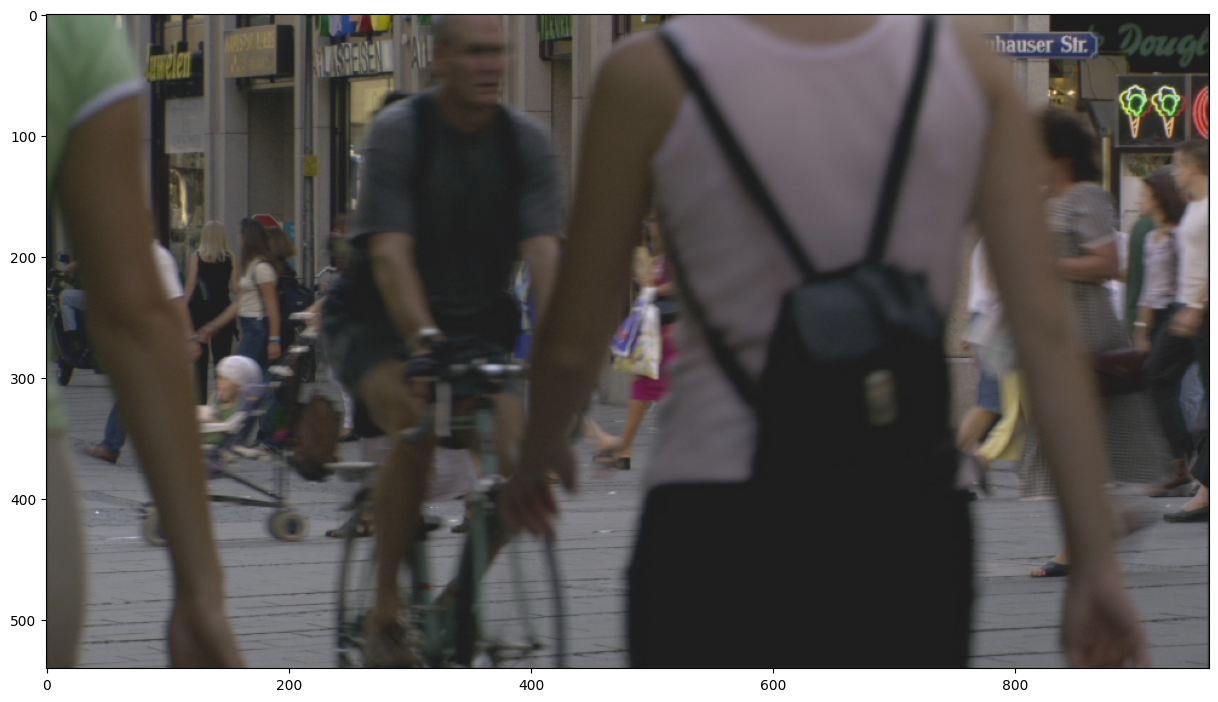

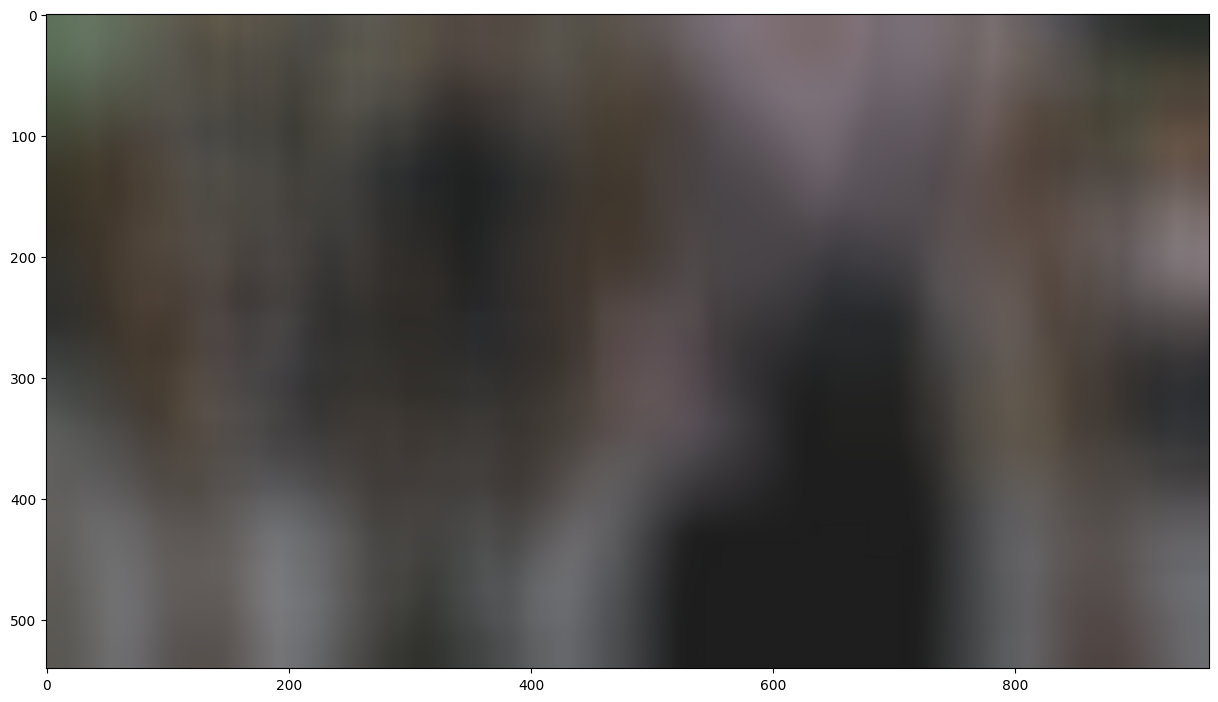

In [65]:
filter.set_params(**df.iloc[-1][hover_data])
plt.figure(figsize=(15,10))
plt.imshow(filter.apply_filter(video[0]))
plt.show()
plt.figure(figsize=(15,10))
filter.set_params(**df.iloc[0][hover_data])
plt.imshow(filter.apply_filter(video[0]))
plt.show()


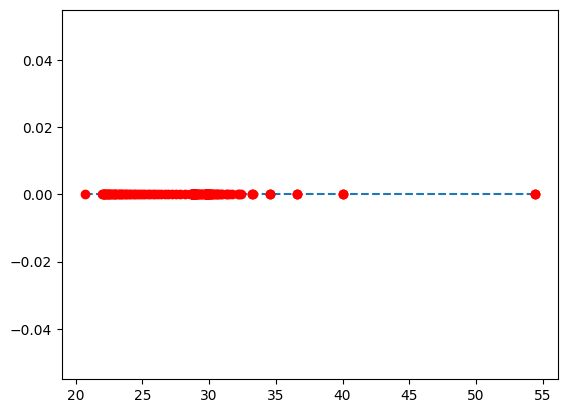

In [66]:
show_values(df[metric_name])

In [67]:
import math

def missing_values(df, metric_name, down_p=0.25, up_p=0.80, mode='n', *args, **kwargs):
    values = df[metric_name]
    values = values.sort_values()
    d_values = values.diff().dropna()
    d_values = d_values.sort_values()
    l = len(d_values)
    if mode == 'n':
        down_n = int(l*down_p)
        up_n = int(l*up_p)
    if mode == 'v':
        down_n = sum(d_values < down_p)
        up_n = sum(d_values < up_p)
    print(down_n, up_n)
    step = d_values.iloc[down_n:up_n].max()
    if pd.isna(step):
        step = up_p
    needed_values = []

    for idx, value in d_values.iloc[up_n:].items():
        num = math.ceil(value/step)
        needed_values += [values.loc[idx] - (value / num) * j for j in range(1, num)]
    return needed_values

def find_pairs(grid_values, needed_values, q):
    delta_matrix = abs(grid_values[:,None] - needed_values[None,:])
    needed_idx = np.ones(len(needed_values)).astype(bool)
    grid_idx = np.zeros(len(grid_values)).astype(bool)
    while (delta_matrix <= q).any():
        i, j = np.unravel_index( delta_matrix.argmin() , delta_matrix.shape)
        delta_matrix[i,:] = q + 1
        delta_matrix[:,j] = q + 1
        grid_idx[i] = 1
        needed_idx[j] = 0
    return grid_values[grid_idx], needed_values[needed_idx]

def create_grid(values, n=10, p=0.1, max_value=float('inf'), min_value=-float('inf'), *args, **kwargs):
    values = np.array(values)
    max_value, min_value = min(values.max(), max_value), max(values.min(), min_value)
    delta = (max_value - min_value) / (n - 1)
    grid_values = np.linspace(min_value, max_value, n)
    
    found_values, needed_values = find_pairs(values, grid_values, delta * p / 2)

    return needed_values, found_values

In [68]:
needed_values, grid_values= create_grid(df[metric_name], n = 10, p = 0.60, min_value=args.min_value, max_value=args.max_value)
needed_idx = 0

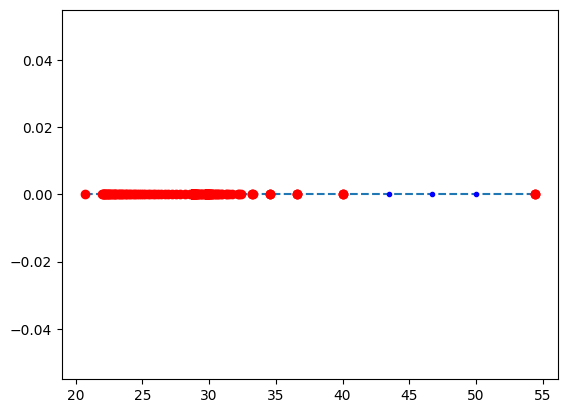

In [69]:
show_values(df[metric_name], needed_values)

In [70]:
res_df = runner.optuna_runner(reader, filter_cls, needed_values, df, n_trials=25)

/home/gehrin/MSU/VLM/get_augmentations-main/runner.py:160: ExperimentalWarning:

QMCSampler is experimental (supported from v3.0.0). The interface can change in the future.

[I 2025-03-24 15:23:39,405] A new study created in memory with name: runner
[I 2025-03-24 15:23:39,408] Trial 0 finished with value: 10.98038101196289 and parameters: {'ksize': 11, 'sigma': 0.4}. Best is trial 0 with value: 10.98038101196289.
[I 2025-03-24 15:23:39,409] Trial 1 finished with value: 10.98038101196289 and parameters: {'ksize': 9, 'sigma': 0.4}. Best is trial 0 with value: 10.98038101196289.
[I 2025-03-24 15:23:39,411] Trial 2 finished with value: 10.98038101196289 and parameters: {'ksize': 93, 'sigma': 0.4}. Best is trial 0 with value: 10.98038101196289.
[I 2025-03-24 15:23:39,412] Trial 3 finished with value: 3.420207977294922 and parameters: {'ksize': 93, 'sigma': 0.711111}. Best is trial 3 with value: 3.420207977294922.
[I 2025-03-24 15:23:39,413] Trial 4 finished with value: 3.420207977294922 and

In [40]:
# res_df.to_csv('result_new_1.csv')

In [88]:
res_df = res_df.drop_duplicates().reset_index()

In [89]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [90]:
new_needed_values, new_grid_values = create_grid(res_df[metric_name], n = 10, p = 0.60, min_value=args.min_value, max_value=args.max_value)

In [91]:
grid = res_df.loc[res_df['type']=='calculated']
hover_data = df.columns[~df.columns.isin([metric_name, 'type'])]

fig = go.Figure()
fig = px.scatter(res_df, x=metric_name, y=1*np.ones(len(res_df)), hover_data=list(hover_data), symbol='type', symbol_sequence=['square', 'x'], color='type', color_discrete_sequence=['green', 'orange'])
fig.add_traces([
    # go.Scatter(x=res_df[res_df['type']=='calculated'], y=np.ones_like(res_df[res_df['type']=='calculated']), mode='markers', name='calculated'),
    # go.Scatter(x=res_df[res_df['type']=='calculated'], y=np.ones_like(res_df['type']=='calculated'), mode='markers', name='genetic'),
    go.Scatter(x=new_needed_values, y=np.ones_like(new_needed_values), mode='markers', name='needed', marker=dict(symbol='square',color='black', size=5)),
    go.Scatter(x=needed_values, y=np.ones_like(needed_values), mode='markers', name='first_needed', marker=dict(symbol='square',color='black', size=5)),
    go.Scatter(x=new_grid_values, y=np.ones_like(new_grid_values), mode='markers', name='choosed', marker=dict(color='red', size=5)),
    go.Scatter(x=grid_values, y=np.ones_like(grid_values), mode='markers', name='first_choosed', marker=dict(color='red', size=5)),
    ])

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(
                    args=[{"xaxis.type": "linear"}],
                    label="Linear X",
                    method="relayout"
                ),
                dict(
                    args=[{"xaxis.type": "log"}],
                    label="Log X",
                    method="relayout"
                )
            ],
            pad={"r": 0, "t": 0},
            showactive=True,
            xanchor="left",
            yanchor="top"
        ),
    ]
)


fig.show()


In [92]:
filter = filter_cls(reader.shape)
video = np.stack(list(reader))

In [93]:
# # row = new_df.loc[0]
# res_video = []

# for _, row in res_df[res_df.psnr.isin(grid_values)].sort_values(metric_name).iterrows():
#     params = row[['ksize', 'sigma']].to_dict()
#     color = (1,0,0) if (row['type'] == 'grid') else (0,1,0)
#     filter.set_params(**params)
#     frame = filter.apply_filter(video[10])
#     frame = cv2.putText(img=np.copy(frame), text = f'psnr={row['psnr']}', org=(0,100),fontFace=0, fontScale=3, color=color, thickness=5)
#     frame = cv2.putText(img=np.copy(frame), text = f'ksize={row['ksize']}', org=(0,200),fontFace=0, fontScale=3, color=color, thickness=5)
#     frame = cv2.putText(img=np.copy(frame), text = f'sigma={row['sigma']}', org=(0,300),fontFace=0, fontScale=3, color=color, thickness=5)
#     res_video.append(frame)

In [94]:
len(new_grid_values)

10

In [97]:
res_df[res_df[metric_name].isin(new_grid_values)].drop_duplicates(metric_name)

,index,ksize,sigma,psnr,type
0,194,93,100.0,20.661671,calculated
30,164,93,10.977778,23.870295,calculated
49,145,93,5.066667,27.212563,calculated
166,11,9,3.822222,30.439817,calculated
182,4,9,1.644444,33.260628,calculated
188,2,9,1.022222,36.578255,calculated
189,131,93,0.711111,40.060162,calculated
237,0,57,0.490897,46.724659,genetic
241,0,71,0.563464,43.515965,genetic
269,0,23,0.443946,49.982552,genetic


In [ ]:
n,h,w,c = video.shape
writer = y4m_writer('gif_blur.y4m', width=w, height=h, fps='25:1')
duration = 25
up = 25
delta = 50
thickness = 3
fontScale = 1
frame_idx = 0
# while idx < len(res_df):

def make_frame(frame, row):
    params = row[hover_data].to_dict()
    color = (1,0,0) if (row['type'] == 'calculated') else (0,1,0)
    filter.set_params(**params)
    frame = filter.apply_filter(frame)
    frame = cv2.putText(img=np.copy(frame), text = f'{metric_name}={np.round(row[metric_name], 2)}', org=(0,up),fontFace=0, fontScale=fontScale, color=color, thickness=thickness)
    for i, name in enumerate(hover_data):
        frame = cv2.putText(img=np.copy(frame), text = f'{name}={row[name]}', org=(0,up + (i+1)*delta),fontFace=0, fontScale=fontScale, color=color, thickness=thickness)
        # frame = cv2.putText(img=np.copy(frame), text = f'sigma={np.round(row['sigma'], 2)}', org=(0,300),fontFace=0, fontScale=2, color=color, thickness=5)
    return frame

for idx, row in res_df[res_df[metric_name].isin(new_grid_values)].drop_duplicates(metric_name).sort_values(metric_name).iterrows():
    frame = make_frame(video[10], row)
    for _ in range(duration):
        writer.write_frame(frame)


'''
for idx, row in res_df[res_df[metric_name].isin(new_grid_values)].drop_duplicates(metric_name).sort_values(metric_name).iterrows():
    print(idx)
    params = row[hover_data].to_dict()
    color = (1,0,0) if (row['type'] == 'calculated') else (0,1,0)
    filter.set_params(**params)
    frame = filter.apply_filter(video[frame_idx])
    frame_idx = (frame_idx + 1) % len(video)

    frame = cv2.putText(img=np.copy(frame), text = f'{metric_name}={np.round(row[metric_name], 2)}', org=(0,up),fontFace=0, fontScale=fontScale, color=color, thickness=thickness)
    for i, name in enumerate(hover_data):
        frame = cv2.putText(img=np.copy(frame), text = f'{name}={row[name]}', org=(0,up + (i+1)*delta),fontFace=0, fontScale=fontScale, color=color, thickness=thickness)
        # frame = cv2.putText(img=np.copy(frame), text = f'sigma={np.round(row['sigma'], 2)}', org=(0,300),fontFace=0, fontScale=2, color=color, thickness=5)
    for _ in range(duration):
        writer.write_frame(frame)
'''
writer.close()
!ffmpeg -i gif_blur.y4m -c:v libx264 -preset ultrafast -qp 0 -pix_fmt yuv420p -movflags +faststart output_blur.mp4 -y

0
30
49
166
182
188
189
241
237
269
ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/gehrin/miniconda3/envs/vlm --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5

In [ ]:
import optuna
import optunahub
import itertools


def objective0(trial: optuna.Trial) -> tuple[float, float]:
    x = trial.suggest_float("x", 0, 5)
    y = trial.suggest_float("y", 0, 3)
    print(f'{x = }, {y = }')
    v0 = 4 * x**2 + 4 * y**2
    v1 = (x - 5) ** 2 + (y - 5) ** 2
    return v0, v1

def objective1(trial: optuna.Trial) -> tuple[float, float]:
    x = trial.suggest_float("x", 0, 5)
    y = trial.suggest_float("y", 0, 3)
    print(f'{x = }, {y = }')
    v0 = 4 * x**2 + 4 * y**2
    v1 = (x - 5) ** 2 + (y - 5) ** 2
    return v0, v1


storage = optuna.storages.InMemoryStorage()

# Sampling 0 generation using enqueueing & qmc sampler
study = optuna.create_study(
    directions=["minimize", "minimize"],
    sampler=optuna.samplers.QMCSampler(seed=42),
    study_name="test",
    storage=storage,
)

for x,y in itertools.product([0,1,2], [0.1,0.2,0.3]):
    study.enqueue_trial(
        {
            "x": x,
            "y": y,
        }
    )
study.optimize(objective0, n_trials=12)

# Using sampling results as the initial generation
sampler = optunahub.load_module(
    "samplers/nsgaii_with_initial_trials",
).NSGAIIwITSampler(population_size=25, seed=42)

study = optuna.create_study(
    directions=["minimize", "minimize"],
    sampler=sampler,
    study_name="test",
    storage=storage,
    load_if_exists=True,
)
study.optimize(objective1, n_trials=100)

optuna.visualization.plot_pareto_front(study).show()

In [ ]:
storage.get_all_trials(0)